In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Set the font family to serif
    "font.serif": ["Times New Roman"],  # Specify the serif font
    "font.size": 22,  # Set the default font size
})

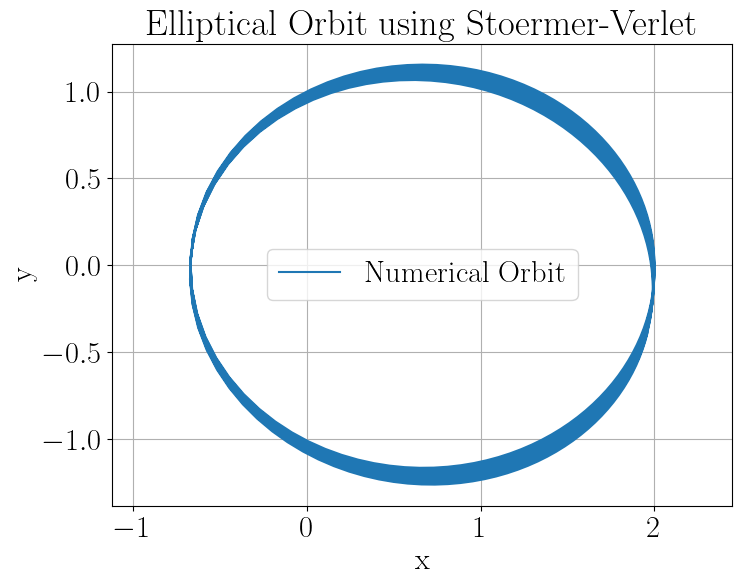

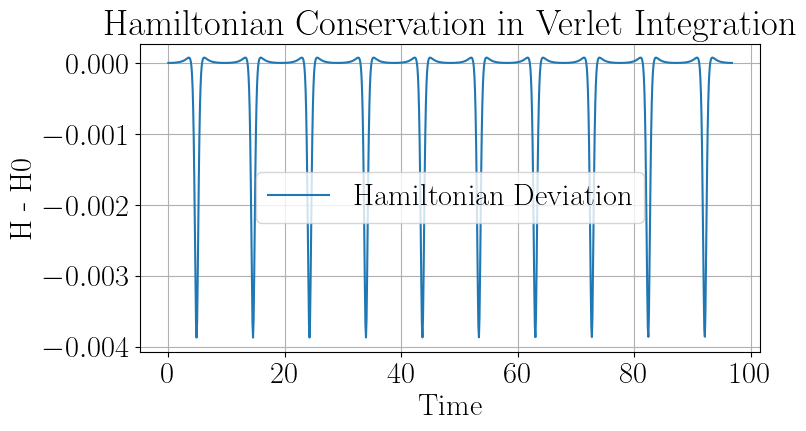

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
a = 4/3
e = 1/2
T = 9.673596609249161
h = 0.01 * T  # Time step
N = int(10 * T / h)  # Total steps

# Initial conditions
x = 2.0
y = 0.0
u = 0.0  # u = dx/dt
v = 0.5  # v = dy/dt

# Arrays to store results
time = np.linspace(0, 10*T, N)
x_vals = np.zeros(N)
y_vals = np.zeros(N)
H_vals = np.zeros(N)

# Verlet integration
for i in range(N):
    # Store values
    x_vals[i] = x
    y_vals[i] = y
    H_vals[i] = 0.5 * (u**2 + v**2) - 1/np.sqrt(x**2 + y**2)
    
    # Compute acceleration
    r = (x**2 + y**2)**1.5
    ax = -x / r
    ay = -y / r
    
    # Half-step velocity
    u_half = u + 0.5 * h * ax
    v_half = v + 0.5 * h * ay
    
    # Full-step position
    x += h * u_half
    y += h * v_half
    
    # Compute new acceleration
    r_new = (x**2 + y**2)**1.5
    ax_new = -x / r_new
    ay_new = -y / r_new
    
    # Second half-step velocity
    u = u_half + 0.5 * h * ax_new
    v = v_half + 0.5 * h * ay_new

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Numerical Orbit')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Elliptical Orbit using Stoermer-Verlet")
plt.legend()
plt.grid()
plt.axis("equal")
plt.show()

# Plot Hamiltonian vs time
plt.figure(figsize=(8, 4))
plt.plot(time, H_vals - H_vals[0], label="Hamiltonian Deviation")
plt.xlabel("Time")
plt.ylabel("H - H0")
plt.title("Hamiltonian Conservation in Verlet Integration")
plt.legend()
plt.grid()
plt.show()

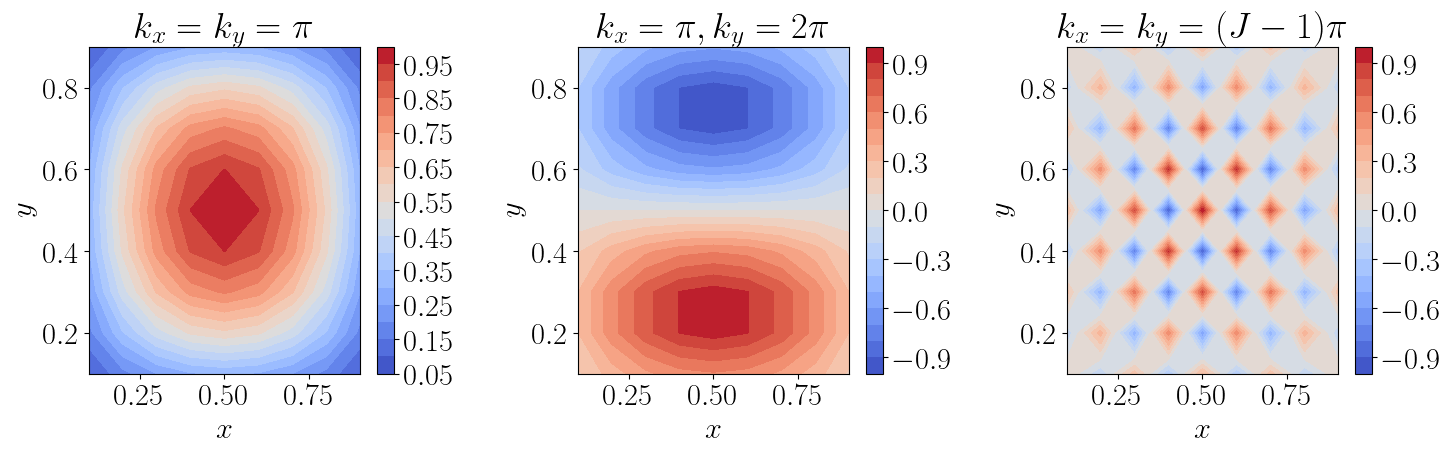

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
J = 10
h = 1 / J
x = np.linspace(h, 1 - h, J - 1)
y = np.linspace(h, 1 - h, J - 1)
X, Y = np.meshgrid(x, y)

# Define eigenvectors
def eigenvector(kx, ky):
    return np.sin(kx * X) * np.sin(ky * Y)

# Eigenvector cases
eigenvectors = {
    r"$k_x = k_y = \pi$": eigenvector(np.pi, np.pi),
    r"$k_x = \pi, k_y = 2\pi$": eigenvector(np.pi, 2 * np.pi),
    r"$k_x = k_y = (J-1)\pi$": eigenvector((J - 1) * np.pi, (J - 1) * np.pi),
}

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (title, v) in zip(axes, eigenvectors.items()):
    c = ax.contourf(X, Y, v, levels=20, cmap="coolwarm")
    fig.colorbar(c, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

plt.tight_layout()
plt.show()
